# Panama Canal Data Analysis

This notebook explores the effects of ship size and lock type on water displacement, water loss, and operational cost in the Panama Canal. The analysis uses a custom Python module to simulate and quantify water usage metrics for different transit scenarios.

In [1]:
from src.canal_data import analyze_transit

In [6]:
import pandas as pd

# Define test ship sizes
ship_sizes = [10_000, 30_000, 50_000, 70_000]
lock_types = ["panamax", "neopanamax"]

# Collect results
results = []

for lock in lock_types:
    for size in ship_sizes:
        result = analyze_transit(ship_size=size, lock_type=lock)
        results.append(result)

# Convert to DataFrame
df = pd.DataFrame(results)
df.head()

,lock_type,ship_size,water_displaced,water_needed,water_lost,cost_per_lock,percent_savings,annual_water_displaced
0,Panamax,10000,2400000,47600000,47600000.0,9520.0,4.800000,201600000000
1,Panamax,30000,7200000,42800000,42800000.0,8560.0,14.400000,604800000000
2,Panamax,50000,12000000,38000000,38000000.0,7600.0,24.000000,1008000000000
3,Panamax,70000,16800000,33200000,33200000.0,6640.0,33.600000,1411200000000
4,Neopanamax,10000,2400000,35600000,19580000.0,7120.0,6.315789,201600000000


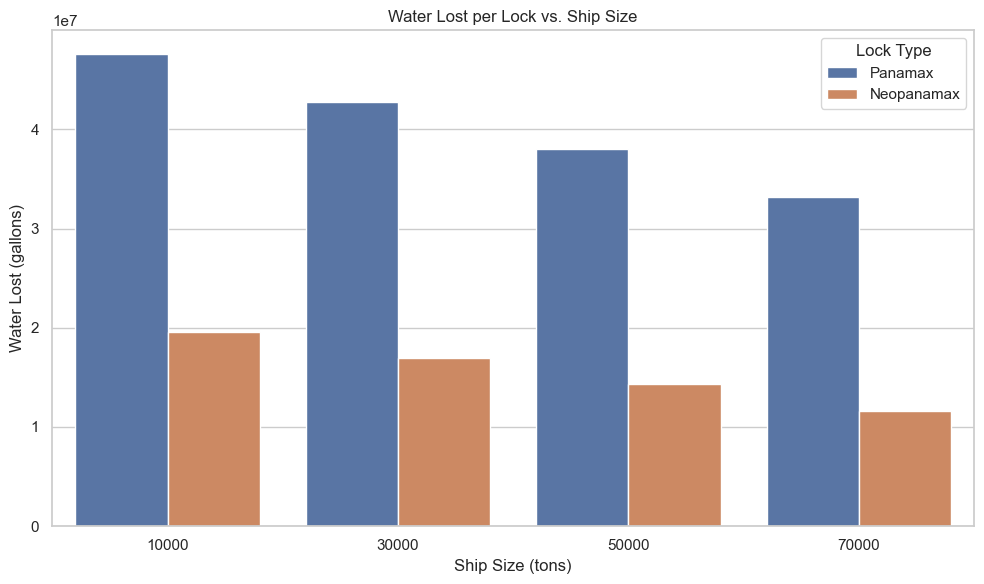

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid") # Set plot style

# Plot water lost per lock by ship size and lock type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="ship_size", y="water_lost", hue="lock_type")

plt.title("Water Lost per Lock vs. Ship Size")
plt.xlabel("Ship Size (tons)")
plt.ylabel("Water Lost (gallons)")
plt.legend(title="Lock Type")
plt.tight_layout()
plt.show()

### Displacement as a Water Saving Mechanism

The chart above shows how water loss decreases with larger ships. The chart below explains why: larger ships displace more water, meaning the lock requires less additional water to lift them. This natural displacement directly reduces water use per transit.

In [4]:
# Add derived column for water saved due to ship displacement
df["water_saved_from_displacement"] = df["water_displaced"]

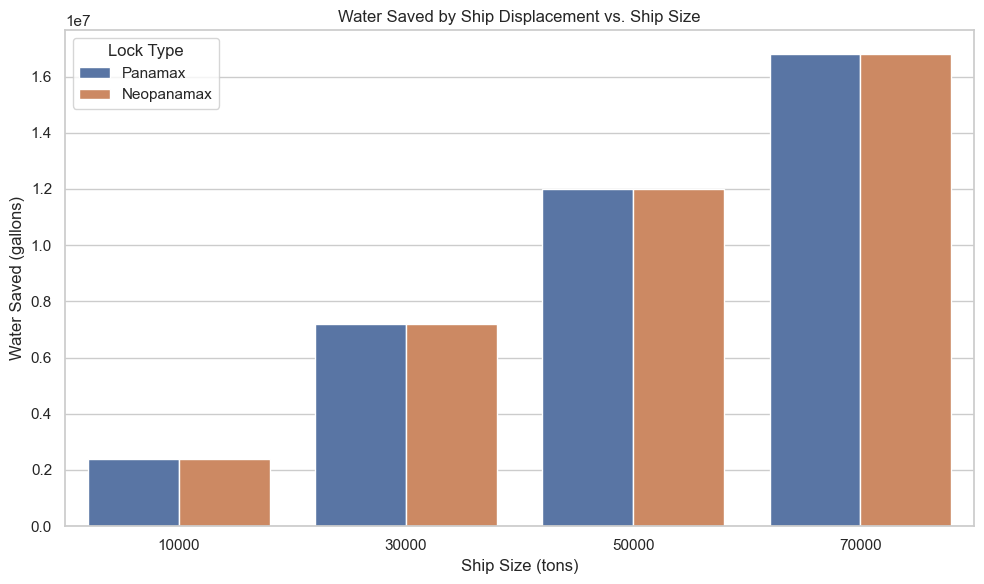

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="ship_size", y="water_saved_from_displacement", hue="lock_type")

plt.title("Water Saved by Ship Displacement vs. Ship Size")
plt.xlabel("Ship Size (tons)")
plt.ylabel("Water Saved (gallons)")
plt.legend(title="Lock Type")
plt.tight_layout()
plt.show()